In [ ]:
#Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

#Functionalities
from collections import Counter
import sys, os

#NLP
import string
import re
import nltk
import gensim
from gensim.utils import simple_preprocess, tokenize
from gensim import corpora, models
import pyLDAvis
from pyLDAvis import gensim_models as gensimvis

# Topic modelling
Our objective by Topic modelling our data is to try and extract valuable information that may allow us to $clusterize$ the different news into $n$ different categories. In order to do this we will approach our data by:
- Building a Bag-Of-Words representation of our data
- Vectorize the data
- Feed the data into a LDA model, in order to get as many $principal components$ as we wish
- Analyze the difference in the words contained by each of the clusters generated by our model

In [2]:
# load data
df = pd.read_csv('../data/processed/fake_or_real_news_clean.csv')

In [3]:
texts = df['text_clean'].apply(simple_preprocess)

In [4]:
dic=corpora.Dictionary(texts)
dic.filter_extremes(no_below=0.02, no_above=0.90)
bow_corpus = [dic.doc2bow(doc) for doc in texts]

In [5]:
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

In [13]:
n_topics = 5

# Build an LDA model
lda_model = models.LdaModel(tfidf_corpus, 
                            id2word=dic, 
                            num_topics=n_topics,
                            random_state=0,   
                            )

In [14]:
n_words = 15

topic_words = pd.DataFrame({})

for i, topic in enumerate(lda_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dic[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True).sort_values('value')

topic_words.head(20)

,value,word,topic
74,0.000102,productions,4
73,0.000104,glp,4
72,0.000106,lawyer,4
71,0.000116,clinton,4
70,0.000122,police,4
69,0.000126,tape,4
68,0.000130,nixon,4
67,0.000130,oyate,4
66,0.000130,tatanka,4
65,0.000147,watergate,4


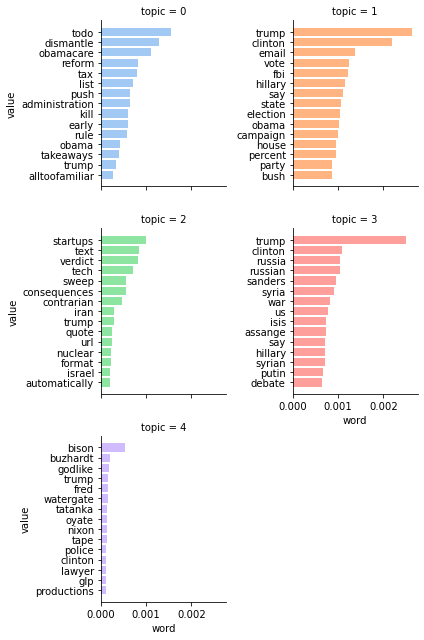

In [15]:
g = sns.FacetGrid(topic_words, col="topic", col_wrap=2, sharey=False,palette='pastel', hue="topic")
g.map(plt.barh, "word", "value")

### Conclusions
After we divided our data in 5 categories, we can observe an interesting result:
- Topic 0 is mainly based on the Obamacare reform that was a part of the political debate in the US in 2016 elections.
- Topic 1 is related to the elections where $donald trump$ and $hillary clinton$ ran against each other.
- Topic 2 is related to ¿tech and startups? I guess
- Topic 3 talks about Trump and Russia, Isis, Syria (also a part of political debate)
- Topic 4 is nonsense